In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [3]:
data = pd.read_csv('data/advertising.csv')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [11]:
data.columns.tolist()

['TV', 'Radio', 'Newspaper', 'Sales']

In [13]:
# Model: y = w0 + w1*x1 + w2*x2 + w3*x3
X = data[['TV', 'Radio', 'Newspaper']].values
y = data['Sales'].values

print(f"Features (X): {X.shape}")
print(f"Target (y): {y.shape}")
print("Features: TV, Radio, Newspaper")
print("Target: Sales")

Features (X): (200, 3)
Target (y): (200,)
Features: TV, Radio, Newspaper
Target: Sales


Dataset Statistics:
               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000

Correlation with Sales:
Sales        1.000000
TV           0.901208
Radio        0.349631
Newspaper    0.157960
Name: Sales, dtype: float64

=== GRAPH 1: CORRELATION HEATMAP ===


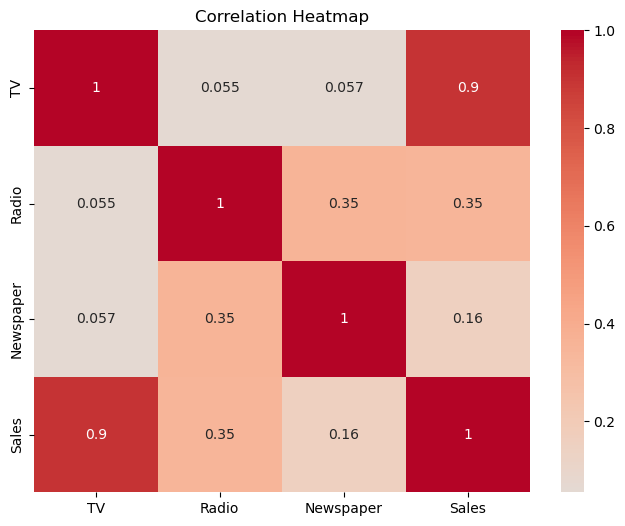


=== GRAPH 2: BOXPLOT ===


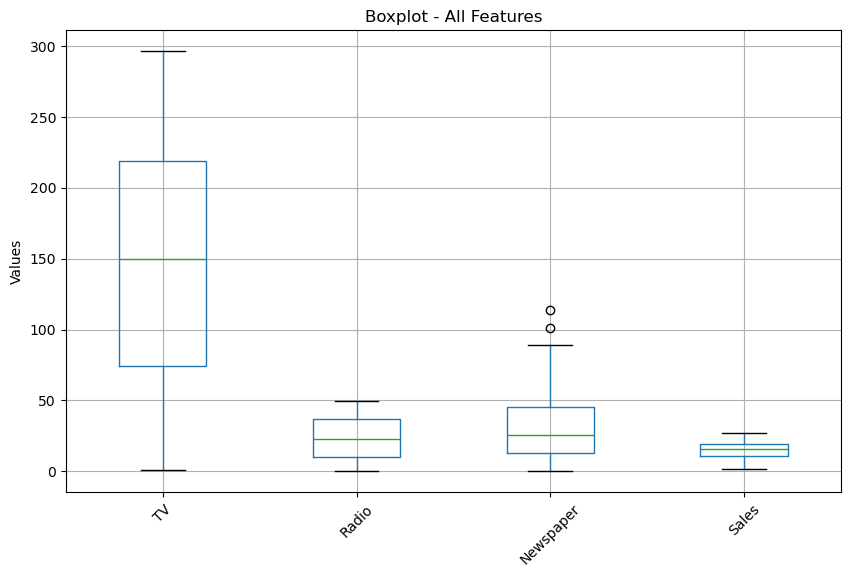


=== GRAPH 3: PAIRPLOT ===


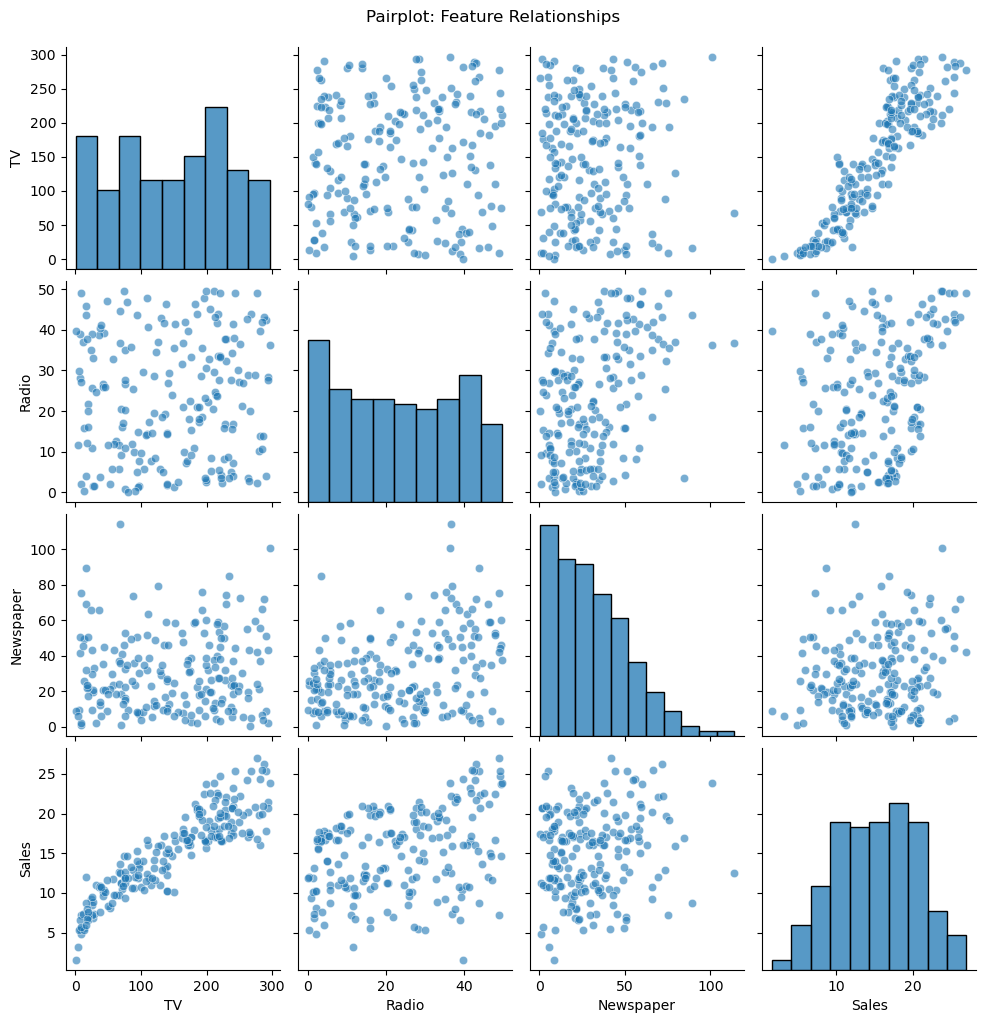


EDA Insights:
- TV has strongest correlation with Sales: 0.901
- Radio has moderate correlation: 0.350
- Newspaper has weakest correlation: 0.158
- All correlations are positive (more advertising = more sales)
- Sales range from 1.6 to 27.0 units


In [25]:
print("Dataset Statistics:")
print(data.describe())

correlation = data.corr()
print(f"\nCorrelation with Sales:")
print(correlation['Sales'].sort_values(ascending=False))

# Method 1: All three plots in sequence (3 separate figures)
print("\n=== GRAPH 1: CORRELATION HEATMAP ===")
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

print("\n=== GRAPH 2: BOXPLOT ===")
plt.figure(figsize=(10, 6))
data.boxplot()
plt.title('Boxplot - All Features')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

print("\n=== GRAPH 3: PAIRPLOT ===")
pairplot_fig = sns.pairplot(data, diag_kind='hist', plot_kws={'alpha': 0.6})
pairplot_fig.fig.suptitle('Pairplot: Feature Relationships', y=1.02)
plt.show()

# INTERPRETATION
print(f"\nEDA Insights:")
print(f"- TV has strongest correlation with Sales: {correlation.loc['TV', 'Sales']:.3f}")
print(f"- Radio has moderate correlation: {correlation.loc['Radio', 'Sales']:.3f}")
print(f"- Newspaper has weakest correlation: {correlation.loc['Newspaper', 'Sales']:.3f}")
print(f"- All correlations are positive (more advertising = more sales)")
print(f"- Sales range from {y.min():.1f} to {y.max():.1f} units")

In [ ]:
class OnlineLearningRegression:
    """Online Learning: Update weights one sample at a time using (y - ŷ)² error"""
    
    def __init__(self, learning_rate=0.001):
        self.w0 = 0.0  # bias
        self.w1 = 0.0  # TV weight
        self.w2 = 0.0  # Radio weight
        self.w3 = 0.0  # Newspaper weight
        self.lr = learning_rate
        self.errors = []  # Track errors over time
    
    def predict_single(self, x1, x2, x3):
        """Predict for a single sample"""
        return self.w0 + self.w1*x1 + self.w2*x2 + self.w3*x3
    
    def update_weights(self, x1, x2, x3, y_true):
        """Update weights using gradient descent on (y - ŷ)² error"""
        
        # 1. Make prediction
        y_pred = self.predict_single(x1, x2, x3)
        
        # 2. Calculate error: (y - ŷ)
        error = y_true - y_pred
        
        # 3. Calculate squared error: (y - ŷ)²
        squared_error = error ** 2
        self.errors.append(squared_error)
        
        # 4. Calculate gradients (derivatives of (y - ŷ)² with respect to weights)
        # d/dw0 [(y - ŷ)²] = -2(y - ŷ)
        # d/dw1 [(y - ŷ)²] = -2(y - ŷ)x1
        # d/dw2 [(y - ŷ)²] = -2(y - ŷ)x2  
        # d/dw3 [(y - ŷ)²] = -2(y - ŷ)x3
        
        grad_w0 = -2 * error
        grad_w1 = -2 * error * x1
        grad_w2 = -2 * error * x2
        grad_w3 = -2 * error * x3
        
        # 5. Update weights (gradient descent: w = w - lr * gradient)
        self.w0 = self.w0 - self.lr * grad_w0
        self.w1 = self.w1 - self.lr * grad_w1
        self.w2 = self.w2 - self.lr * grad_w2
        self.w3 = self.w3 - self.lr * grad_w3
        
        return squared_error
    
    def fit_online(self, X, y, epochs=10):
        """Train using online learning"""
        
        print("Online Learning Training Progress:")
        print("Epoch | Total Error | Avg Error per Sample")
        print("-" * 40)
        
        for epoch in range(epochs):
            total_error = 0
            
            # Process each sample one by one
            for i in range(len(X)):
                x1, x2, x3 = X[i, 0], X[i, 1], X[i, 2]
                y_true = y[i]
                
                # Update weights using this single sample
                squared_error = self.update_weights(x1, x2, x3, y_true)
                total_error += squared_error
            
            # Print error for this epoch
            avg_error = total_error / len(X)
            print(f"{epoch+1:5d} | {total_error:10.4f} | {avg_error:15.4f}")
        
        print(f"\nFinal weights after online learning:")
        print(f"w0 (bias): {self.w0:.4f}")
        print(f"w1 (TV): {self.w1:.4f}")
        print(f"w2 (Radio): {self.w2:.4f}")
        print(f"w3 (Newspaper): {self.w3:.4f}")
    
    def predict(self, X):
        """Predict for multiple samples"""
        return self.w0 + self.w1*X[:, 0] + self.w2*X[:, 1] + self.w3*X[:, 2]
    
    def get_equation(self):
        return f"y = {self.w0:.3f} + {self.w1:.3f}*TV + {self.w2:.3f}*Radio + {self.w3:.3f}*Newspaper"

# Create online learning model
online_model = OnlineLearningRegression(learning_rate=0.00001)
print("Online Learning Model created!")

Online Learning Model created!


In [50]:
class BatchGradientDescentRegression:
    def __init__(self, learning_rate=0.001):
        self.w0 = 0.0  # bias
        self.w1 = 0.0  # TV weight
        self.w2 = 0.0  # Radio weight
        self.w3 = 0.0  # Newspaper weight
        self.lr = learning_rate
        self.error_history = []  # Track total error over epochs
    
    def predict_batch(self, X):
        """Predict for all samples at once"""
        return self.w0 + self.w1*X[:, 0] + self.w2*X[:, 1] + self.w3*X[:, 2]
    
    def calculate_gradients(self, X, y):
        """Calculate gradients using ALL samples (batch processing)"""
        n = len(X)
        
        # 1. Make predictions for ALL samples
        y_pred = self.predict_batch(X)
        
        # 2. Calculate errors for ALL samples: (y - ŷ)
        errors = y - y_pred
        
        # 3. Calculate total squared error: Σ(y - ŷ)²
        total_squared_error = np.sum(errors ** 2)
        self.error_history.append(total_squared_error)
        
        # 4. Calculate gradients (derivatives of Σ(y - ŷ)² with respect to weights)
        # For cost function: J = Σ(y - ŷ)² = Σ(y - (w0 + w1*x1 + w2*x2 + w3*x3))²
        # Gradients are:
        # ∂J/∂w0 = -2 * Σ(y - ŷ)
        # ∂J/∂w1 = -2 * Σ(y - ŷ) * x1
        # ∂J/∂w2 = -2 * Σ(y - ŷ) * x2  
        # ∂J/∂w3 = -2 * Σ(y - ŷ) * x3
        
        grad_w0 = -2 * np.sum(errors)              # Sum of all errors
        grad_w1 = -2 * np.sum(errors * X[:, 0])    # Sum of (error * TV)
        grad_w2 = -2 * np.sum(errors * X[:, 1])    # Sum of (error * Radio)
        grad_w3 = -2 * np.sum(errors * X[:, 2])    # Sum of (error * Newspaper)
        
        # Average gradients by number of samples
        grad_w0 /= n
        grad_w1 /= n
        grad_w2 /= n
        grad_w3 /= n
        
        return grad_w0, grad_w1, grad_w2, grad_w3, total_squared_error
    
    def fit_batch_gradient_descent(self, X, y, epochs=50):
        for epoch in range(epochs):
            # Calculate gradients using ALL samples
            grad_w0, grad_w1, grad_w2, grad_w3, total_error = self.calculate_gradients(X, y)
            
            # Update weights using gradients
            self.w0 = self.w0 - self.lr * grad_w0
            self.w1 = self.w1 - self.lr * grad_w1
            self.w2 = self.w2 - self.lr * grad_w2
            self.w3 = self.w3 - self.lr * grad_w3
            
        
        print(f"\nFinal weights after batch gradient descent:")
        print(f"w0 (bias): {self.w0:.4f}")
        print(f"w1 (TV): {self.w1:.4f}")
        print(f"w2 (Radio): {self.w2:.4f}")
        print(f"w3 (Newspaper): {self.w3:.4f}")
        
        # Calculate final error
        final_predictions = self.predict_batch(X)
        final_errors = y - final_predictions
        final_total_error = np.sum(final_errors ** 2)
        print(f"Final Total Σ(y-ŷ)² = {final_total_error:.2f}")
    
    def predict(self, X):
        """Predict for multiple samples"""
        return self.predict_batch(X)
    
    def get_equation(self):
        return f"y = {self.w0:.3f} + {self.w1:.3f}*TV + {self.w2:.3f}*Radio + {self.w3:.3f}*Newspaper"

# Create batch gradient descent model
batch_gd_model = BatchGradientDescentRegression(learning_rate=0.0001)
print("Batch Gradient Descent Model created!")

Batch Gradient Descent Model created!


In [52]:
print("\nOnline Learning Training...")
online_model.fit_online(X, y, epochs=10)


Online Learning Training...

Final weights after online learning:
w0 (bias): 0.0297
w1 (TV): 0.0745
w2 (Radio): 0.1603
w3 (Newspaper): 0.0181


In [56]:
print(f"\nBatch Gradient Descent Training...")
batch_gd_model.fit_batch_gradient_descent(X, y, epochs=50)


Batch Gradient Descent Training...

Final weights after batch gradient descent:
w0 (bias): -6201887430590104200023605457176661072424572177225507792140739018752.0000
w1 (TV): -1206586371564447172699032821451517319111273388001168926798559339085824.0000
w2 (Radio): -148893124494686749355250585404475630972969031893403310106183303430144.0000
w3 (Newspaper): -197364888120997835463874376835263543938877188536932283639962164789248.0000
Final Total Σ(y-ŷ)² = 9144295354490154382445637911099820941314203505948466620950090130293386490041485745684652250930964557992669845181140563846924742718270676890812416.00
